*Marco Teorico*

La regresión lineal múltiple es una técnica estadística utilizada para modelar la relación entre una variable dependiente continua y múltiples variables independientes. En este caso, se analiza cómo variables demográficas y de estilo de vida (edad, sexo, IMC, número de hijos, hábito de fumar y región) influyen en el costo del seguro médico.

El análisis de varianza (ANOVA) permite evaluar si las variables independientes explican una proporción significativa de la variabilidad en la variable dependiente. Se utilizan pruebas de hipótesis basadas en el estadístico F y el valor-p para determinar la significancia estadística de cada predictor.

El coeficiente de determinación 
𝑅2 indica qué porcentaje de la variabilidad total en la variable dependiente es explicado por el modelo. Un 𝑅2
alto sugiere un buen ajuste del modelo a los datos.

*Metodologia*

Limpieza de datos: Se eliminaron los valores nulos utilizando dropna() para asegurar la calidad de los análisis.

Análisis exploratorio:

Se utilizaron histogramas (con seaborn) para visualizar la distribución de variables como la edad.

Se identificaron los valores únicos de variables categóricas como sex.

Modelado estadístico:

Se aplicó una regresión lineal múltiple para analizar el efecto conjunto de las variables independientes sobre el costo del seguro (charges).

Se evaluó la significancia estadística de cada predictor utilizando ANOVA y valores-p.

Evaluación del modelo:

Se reportó el coeficiente de determinación 𝑅2, que resultó ser 0.7809, indicando que el 78.09% de la variabilidad en los costos del seguro puede explicarse por el modelo.

*Hipotesis*

El objetivo principal del modelo es analizar si las variables independientes age, sex, bmi, children, smoker y region tienen un efecto significativo sobre el costo del seguro médico (charges).

Se plantean las siguientes hipótesis generales:

Hipótesis nula (H₀): Ninguna de las variables independientes tiene un efecto significativo sobre charges. 
Hipótesis alternativa (H₁): Al menos una de las variables independientes tiene un efecto significativo sobre charges.





In [160]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Aleman2202/Estadistica-Inferenical-II/refs/heads/main/insurance.csv')
df.dropna(inplace=True)
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


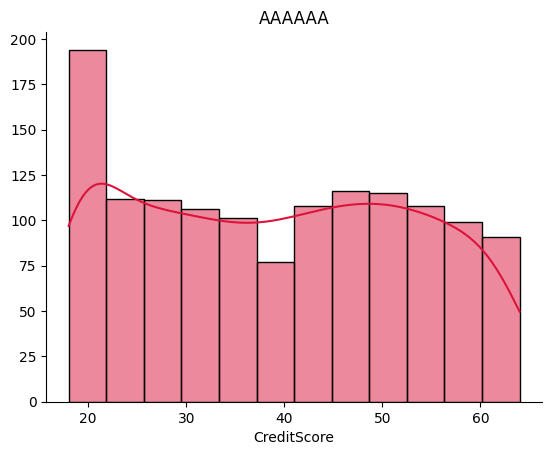

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['age'], kde = True, color = 'crimson')

plt.xlabel('CreditScore')
plt.ylabel('')
plt.title('AAAAAA')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [162]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [163]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('charges ~ C(sex)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(sex),1.0,6.435902e+08,6.435902e+08,4.399702,0.036133
Residual,1336.0,1.954306e+11,1.462804e+08,NaN,NaN


In [164]:
niveles = {'male': 1, 'female': 2}
df['sex'] = df['sex'].map(niveles)
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,2,31.920,0,no,northeast,2205.98080
1335,18,2,36.850,0,no,southeast,1629.83350
1336,21,2,25.800,0,no,southwest,2007.94500


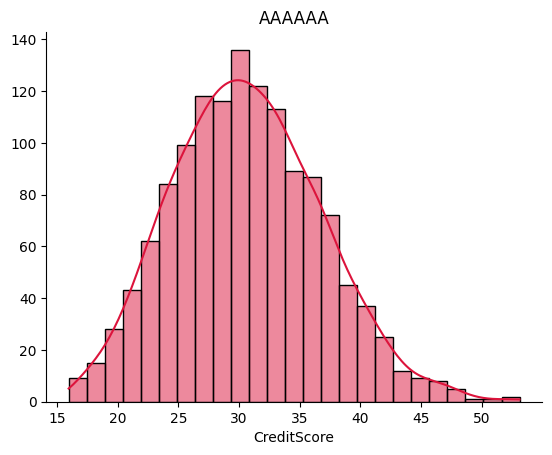

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['bmi'], kde = True, color = 'crimson')

plt.xlabel('CreditScore')
plt.ylabel('')
plt.title('AAAAAA')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [166]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('charges ~ C(children)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(children),5.0,2.396917e+09,4.793833e+08,3.29692,0.005786
Residual,1332.0,1.936773e+11,1.454034e+08,NaN,NaN


El valor p = 0.005786 es menor a 0.05, lo que indica que la variable children tiene un efecto significativo sobre la variable dependiente.

Existe evidencia estadística suficiente para afirmar que hay diferencias significativas en la media de la variable dependiente entre los diferentes grupos de children.

In [167]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('charges ~ C(smoker)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova 

,df,sum_sq,mean_sq,F,PR(>F)
C(smoker),1.0,1.215199e+11,1.215199e+11,2177.614868,8.271436e-283
Residual,1336.0,7.455432e+10,5.580413e+07,NaN,NaN


El valor p ≈ 8.27 × 10⁻²⁸³ es extremadamente bajo, prácticamente 0.

El valor de F = 2177.61 es altísimo.

Esto significa que la variable smoker tiene un efecto altamente significativo sobre la variable dependiente.



In [168]:
niveles = {'no': 0, 'yes': 1}
df['smoker'] = df['smoker'].map(niveles)
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,2,31.920,0,0,northeast,2205.98080
1335,18,2,36.850,0,0,southeast,1629.83350
1336,21,2,25.800,0,0,southwest,2007.94500


In [169]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [170]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('charges ~ C(region)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova 

,df,sum_sq,mean_sq,F,PR(>F)
C(region),3.0,1.300760e+09,4.335866e+08,2.969627,0.030893
Residual,1334.0,1.947735e+11,1.460071e+08,NaN,NaN


El valor p = 0.0309 es menor que 0.05, lo que indica que la variable region es estadísticamente significativa al explicar la variación de la variable dependiente.

El valor de F = 2.97 sugiere que hay diferencias entre las medias de al menos uno de los grupos de la variable region.

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -3428.9343 1451.3161  False
northeast southeast  1329.0269 0.4745 -1044.9417 3702.9955  False
northeast southwest -1059.4471 0.6792 -3499.5723 1380.6781  False
northwest southeast  2317.8361 0.0583   -54.1994 4689.8716  False
northwest southwest    -70.638 0.9999 -2508.8826 2367.6066  False
southeast southwest -2388.4741 0.0477 -4760.5096  -16.4386   True
-----------------------------------------------------------------


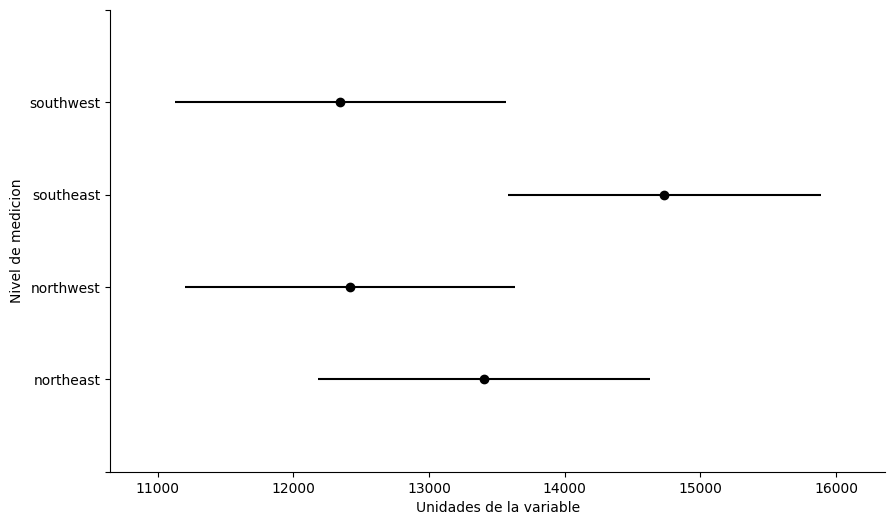

In [171]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['charges'], groups = df['region'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [172]:
niveles = {'northeast': 1, 'northwest': 0, 'southeast': 2, 'southwest': 0}
df['region'] = df['region'].map(niveles)
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,0,21984.47061
4,32,1,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,10600.54830
1334,18,2,31.920,0,0,1,2205.98080
1335,18,2,36.850,0,0,2,1629.83350
1336,21,2,25.800,0,0,0,2007.94500


In [173]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('charges ~ C(region)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova 

,df,sum_sq,mean_sq,F,PR(>F)
C(region),2.0,1.299949e+09,6.499744e+08,4.454982,0.011794
Residual,1335.0,1.947743e+11,1.458983e+08,NaN,NaN


p = 0.0118, que sigue siendo < 0.05, lo cual indica que la variable region sigue siendo estadísticamente significativa, incluso al haber reducido sus niveles.

F = 4.455 es más alto que en el análisis anterior (2.97), lo cual sugiere una señal más clara ahora, probablemente porque la agrupación o limpieza mejoró la calidad del análisis.



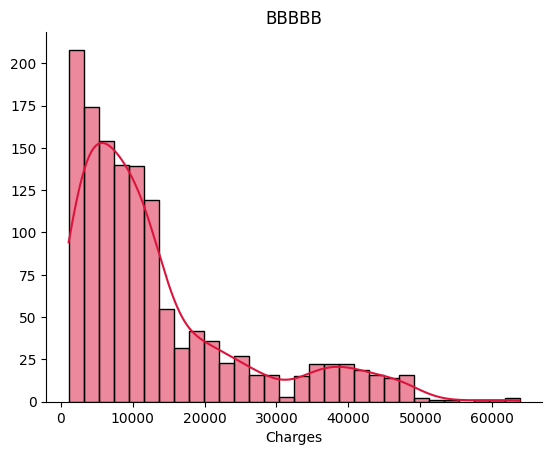

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'], kde = True, color = 'crimson')

plt.xlabel('Charges')
plt.ylabel('')
plt.title('BBBBB')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Text(0.5, 1.0, 'Matriz de correlacion')

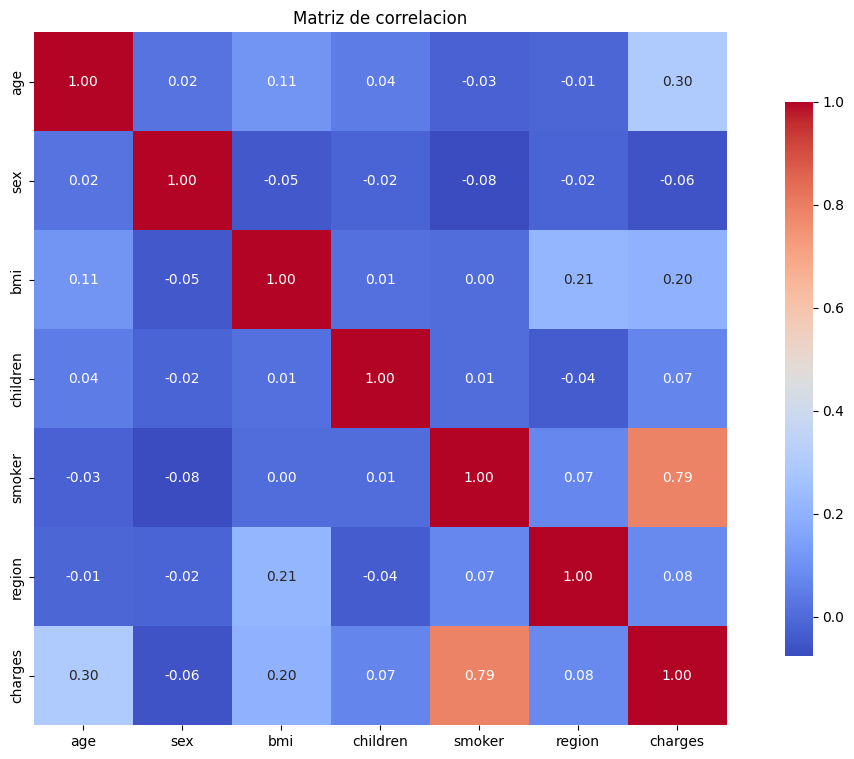

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion = df.corr()
plt.figure(figsize = (15, 9))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = "0.2f", square = True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de correlacion')

smoker es la variable más poderosa explicando charges. Esto también lo confirmaste con el F y p-value en ANOVA.

age y bmi también son relevantes, aunque con efectos más moderados.

sex, region, y children tienen poca correlación lineal directa, aunque algunas de ellas resultaron significativas en ANOVA (como region y children), por lo que podrían estar aportando información cuando se incluyen en conjunto en un modelo de regresión.

Coeficiente de determinación:  0.7809


,sum_sq,df,F,PR(>F)
age,1.722595e+10,1.0,467.314627,4.558928e-89
sex,5.467814e+06,1.0,0.148334,7.001943e-01
bmi,4.949172e+09,1.0,134.263745,1.199788e-29
children,4.304733e+08,1.0,11.678106,6.514797e-04
smoker,1.223656e+11,1.0,3319.597325,0.000000e+00
region,1.021846e+07,1.0,0.277212,5.986224e-01
Residual,4.906275e+10,1331.0,NaN,NaN


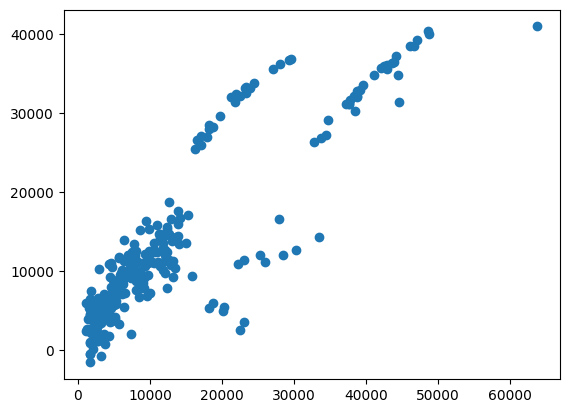

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[[ 'age', 'sex', 'bmi', 'children', 'smoker', 'region' ]]
Y = df['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42 )

x_train_constante = sm.add_constant(X_train)
x_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, x_train_constante).fit()

Yc = modelo.predict(x_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinación: {r2: 0.4}')

from statsmodels.formula.api import ols

moedo_2 = ols(formula = 'charges ~ age + sex + bmi + children + smoker + region', data = df).fit()
tabla_anova = sm.stats.anova_lm(moedo_2, typ = 2)  # ANOVA de una via
tabla_anova

Variables estadísticamente significativas (valor-p < 0.05):

age, bmi, children, smoker. Estas variables tienen un efecto significativo sobre la variable dependiente.

Variables no significativas:

sex y region. Sus valores-p son muy altos, lo que indica que no aportan significativamente al modelo.

En este modelo, ser fumador, la edad, el IMC y el número de hijos son factores que influyen de forma significativa en el resultado. Por otro lado, el sexo y la región no parecen tener un impacto estadísticamente relevante.

El modelo explica el 78.09% de la variabilidad en la variable dependiente a partir de las variables independientes.

Es un valor bastante alto, lo que indica que el modelo tiene una buena capacidad predictiva.

El restante 21.91% de la variación se debe a factores no incluidos en el modelo o a errores aleatorios.

In [177]:
b0, b1, b2, b3, b4, b5, b6  = modelo.params

Fun = lambda X1, X2, X3, X4, X5, X6 : b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + b5 * X5 + b6 *X6

#Una persona esta intereasada en saber cuanto seria su pago anual a su seguro medico, te proporciona la siguiente informacion .

Fun(22, 1, 30.97, 2, 0, 2)

4570.171417412521